<a href="https://colab.research.google.com/github/abdoulahat/Apprentissage/blob/master/Tensorflow2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Classification**

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [0]:
# load the data
data = load_breast_cancer()

In [0]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [0]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can reat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# data (the attribute ) means the input data
data.data.shape

(569, 30)

In [0]:
# targets
data.target
# note how targets are just 0s et 1s
# normally, when you have K targets, the are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [0]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
# normaly we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
# Scale the data 
# you'll lear why scalling in needed in a course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do: 
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_size=(D,), activation='sigmoid')

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

# Evaluate the model - evalute() return loss and accuray
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 1.1068 - accuracy: 0.1470 - val_loss: 1.0154 - val_accuracy: 0.2234
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9983 - accuracy: 0.1864 - val_loss: 0.9242 - val_accuracy: 0.2553
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9013 - accuracy: 0.2598 - val_loss: 0.8417 - val_accuracy: 0.3457
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8144 - accuracy: 0.3596 - val_loss: 0.7696 - val_accuracy: 0.4362
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7396 - accuracy: 0.4829 - val_loss: 0.7062 - val_accuracy: 0.5266
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6142 - val_loss: 0.6518 - val_accuracy: 0.6277
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.6955 - val_loss: 0.6038 - val_accuracy: 0.7021
Epoch 8/100


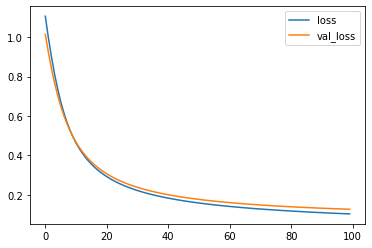

In [0]:
# plot what's returnes by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

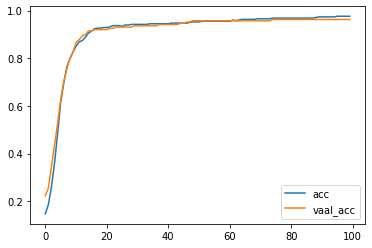

In [0]:
# plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='vaal_acc')
plt.legend()

In [0]:
# Make predictions
p = model.predict(X_test)
print(p) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1|X)

[[9.42119062e-01]
 [9.61014271e-01]
 [3.52578759e-02]
 [7.12409317e-02]
 [9.71992254e-01]
 [9.93638694e-01]
 [9.90925670e-01]
 [8.23318839e-01]
 [1.67105108e-01]
 [9.86524820e-01]
 [4.48197126e-03]
 [9.94459450e-01]
 [8.65232944e-03]
 [6.68399096e-01]
 [1.95508301e-02]
 [4.18762088e-01]
 [9.92699862e-01]
 [9.64424849e-01]
 [3.09514105e-02]
 [9.96863365e-01]
 [9.85136509e-01]
 [7.99453497e-01]
 [9.79135454e-01]
 [6.15050614e-01]
 [4.21941280e-04]
 [2.63490975e-02]
 [2.10111216e-06]
 [9.07591105e-01]
 [9.52420473e-01]
 [9.55579638e-01]
 [9.95259941e-01]
 [5.20784199e-01]
 [5.07068634e-03]
 [9.96708274e-01]
 [9.17047560e-01]
 [2.37871706e-02]
 [9.96435881e-01]
 [9.74163711e-01]
 [8.67515802e-04]
 [9.53945160e-01]
 [9.49553847e-01]
 [9.97052491e-01]
 [7.97708035e-01]
 [1.01768970e-03]
 [3.83549929e-03]
 [3.80632281e-03]
 [9.73638058e-01]
 [7.31080770e-04]
 [9.05748725e-01]
 [8.78281176e-01]
 [5.14236689e-02]
 [9.68573749e-01]
 [8.05324316e-03]
 [9.95732188e-01]
 [9.98137236e-01]
 [1.345345

In [0]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,1)
import numpy as np
p = np.round(p).flatten()
print(p)

[1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]


In [0]:
# Calculate the accuracy, compare it to evaluate() output
print('Mannually calculated accuracy', np.mean(p == y_test))
print('Evaluate output:', model.evaluate(X_test, y_test))

Mannually calculated accuracy 0.9627659574468085
6/6 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9628
Evaluate output: [0.1265822947025299, 0.9627659320831299]


# **Performs the Linear Classification**

1) load in the data(X and Y) - may involve transforming data

2) Intantiate the model

3) Train fit the model

4) Evaluate the model



In [0]:
# other imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Get the data
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore (1).csv


In [0]:
# Load in the data
import io
data = pd.read_csv(io.BytesIO(uploaded["moore.csv"]), index_col=0).reset_index().values
X = data[:,0].reshape(-1, 1) # make it a two D array of size N x D where D=1
Y = data[:,1]

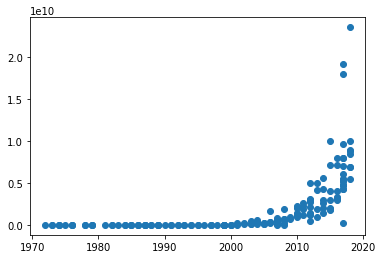

In [0]:
# Plot the data - it is exponential!
plt.scatter(X, Y) 

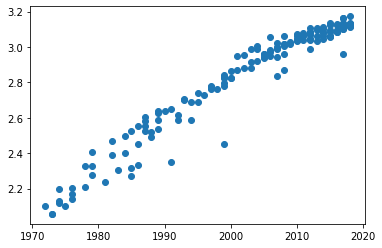

In [0]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [0]:
# Let's also center the X data so the values are not too large
# We could scale it too but we'd have to reserve the transformation later
X = X - X.mean()

In [0]:
# Now create our Tesoflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam, loss='mse')

# learning rate scheuler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

schedule = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=(schedule))

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 75.1870 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 107.5560 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 75.8903 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 69.0912 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 54.5074 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 40.3850 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 23.2082 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 12.0134 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 12.1879 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 8.1160 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 3.7387 

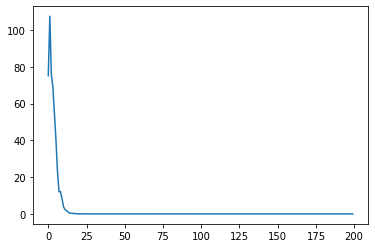

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [0]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the 'Input' layer doesn't count
print(model.layers[0].get_weights())

[array([[0.02256851]], dtype=float32), array([2.8371556], dtype=float32)]


In [0]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]